### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn import preprocessing

In [2]:
%matplotlib inline

In [3]:
path = 'C:\\Users\\Marce\\careerfoundry\\food'

In [4]:
df = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'alright.xlsx'))

In [5]:
pd.set_option('precision', 0)

In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
df.shape

(1048575, 8)

In [8]:
df.head()

,country,product,currency,unit,month,year,price,USD
0,Afghanistan,Bread - Retail,AFN,KG,1,2014,50.000,0.583
1,Afghanistan,Bread - Retail,AFN,KG,2,2014,50.000,0.583
2,Afghanistan,Bread - Retail,AFN,KG,3,2014,50.000,0.583
3,Afghanistan,Bread - Retail,AFN,KG,4,2014,50.000,0.583
4,Afghanistan,Bread - Retail,AFN,KG,5,2014,50.000,0.583


In [9]:
df.isnull().sum()

country         0
product         0
currency        0
unit            0
month           0
year            0
price           0
USD         13470
dtype: int64

In [10]:
df['USD'].fillna(df['USD'].median(), inplace = True)

In [11]:
df.isnull().sum()

country     0
product     0
currency    0
unit        0
month       0
year        0
price       0
USD         0
dtype: int64

In [12]:
df.drop(['price'],axis=1,inplace=True)

In [13]:
df.head()

,country,product,currency,unit,month,year,USD
0,Afghanistan,Bread - Retail,AFN,KG,1,2014,0.583
1,Afghanistan,Bread - Retail,AFN,KG,2,2014,0.583
2,Afghanistan,Bread - Retail,AFN,KG,3,2014,0.583
3,Afghanistan,Bread - Retail,AFN,KG,4,2014,0.583
4,Afghanistan,Bread - Retail,AFN,KG,5,2014,0.583


In [14]:
df2=df.groupby(['country', 'product','unit']).mean('USD')

In [15]:
le = preprocessing.LabelEncoder()
df2["USD"] = le.fit_transform(df2.USD.values)

### 2. The elbow technique

In [16]:
# define range of potential clusters
num_cl = range(1, 5)

# define k-means clusters in the range from above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [17]:
# create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))]

score

C:\Users\Marce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


[-257109487.30109113,
 -68947726.12290485,
 -29121808.57278096,
 -16291264.140692396]

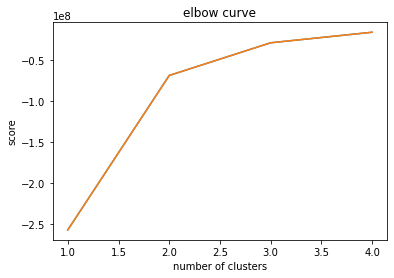

In [18]:
# Plot the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('number of clusters')
pl.ylabel('score')
pl.title('elbow curve')
pl.plot(num_cl,score)
pl.show()

# breakpoint is clearly 2, that's why I chose 2

### 3. k-means clustering

In [19]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2, n_jobs = -1) 

In [20]:
kmeans.fit(df2)

C:\Users\Marce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=2, n_jobs=-1)

In [21]:
df2['clusters'] = kmeans.fit_predict(df2)

C:\Users\Marce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [22]:
df2.head(5)

month  \
country     product                                            unit             
Afghanistan Bread - Retail                                     KG       6.423   
            Exchange rate - Retail                             USD/LCU  6.467   
            Fuel (diesel) - Retail                             L        6.527   
            Livestock (sheep, one-year-old alive female) - ... Unit     6.941   
            Oil (cooking) - Retail                             KG       6.400   

                                                                           year  \
country     product                                            unit               
Afghanistan Bread - Retail                                     KG      2013.953   
            Exchange rate - Retail                             USD/LCU 2018.593   
            Fuel (diesel) - Retail                             L       2014.445   
            Livestock (sheep, one-year-old alive female) - ... Unit    2001.123   
            Oil (cooking) - Retail                             KG      2020.467   

                                                                         USD  \
country     product                                            unit            
Afghanistan Bread - Retail                                     KG        279   
            Exchange rate - Retail                             USD/LCU   609   
            Fuel (diesel) - Retail                             L        1357   
            Livestock (sheep, one-year-old alive female) - ... Unit     1453   
            Oil (cooking) - Retail                             KG        828   

                                                                        clusters  
country     product                                            unit               
Afghanistan Bread - Retail                                     KG              0  
            Exchange rate - Retail                             USD/LCU         0  
            Fuel (diesel) - Retail                             L               1  
            Livestock (sheep, one-year-old alive female) - ... Unit            1  
            Oil (cooking) - Retail                             KG              1

In [23]:
df2["clusters"].value_counts()

0    840
1    701
Name: clusters, dtype: int64

In [24]:
df2.describe()

,month,year,USD,clusters
count,1541.000,1541.000,1541.000,1541.000
mean,6.200,2017.074,720.488,0.455
std,0.859,3.344,408.586,0.498
min,1.000,2001.123,0.000,0.000
25%,6.138,2014.973,385.000,0.000
50%,6.355,2018.000,683.000,0.000
75%,6.470,2020.059,1068.000,1.000
max,11.500,2021.000,1453.000,1.000


In [25]:
df2.median()

month         6.355
year       2018.000
USD         683.000
clusters      0.000
dtype: float64

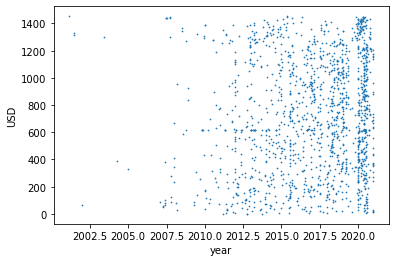

In [26]:
df2.plot(kind='scatter', x='year', y='USD', s=0.5);

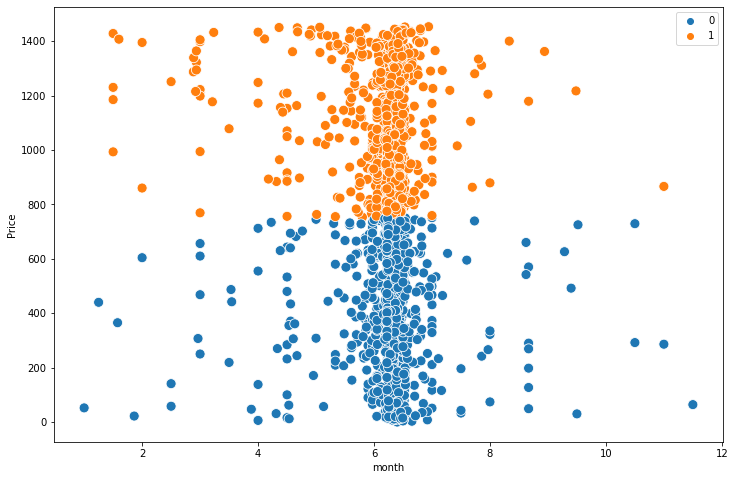

In [27]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['month'], y=df2['USD'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('month') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
#plt.savefig('scatter.png')
plt.show()

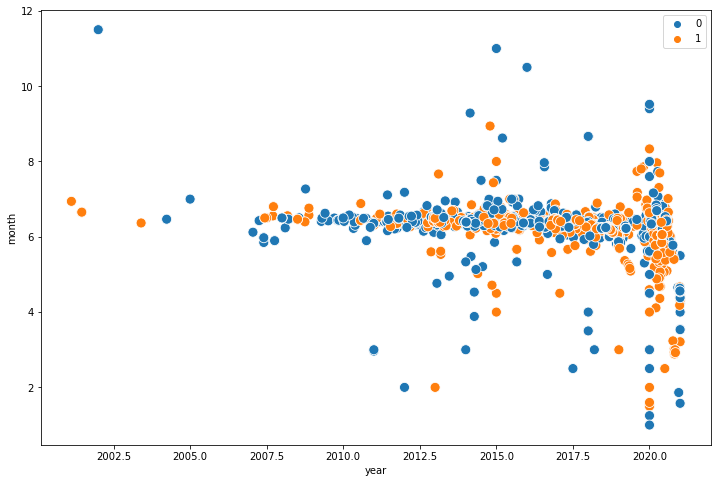

In [28]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['year'], y=df2['month'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('year') # Label x-axis.
plt.ylabel('month') # Label y-axis.
plt.show()

In [29]:
df2.loc[df2['clusters'] == 0, 'clusters'] = 'red'
df2.loc[df2['clusters'] == 1, 'clusters'] = 'blue'

In [30]:
df2.groupby('clusters').agg({'year':['mean', 'median'],
                         'month':['mean', 'median'], 
                         'USD':['mean', 'median']})

year          month             USD         
             mean   median  mean median     mean   median
clusters                                                 
blue     2017.384 2018.305 6.115  6.327 1103.000 1103.000
red      2016.816 2017.515 6.270  6.366  401.273  419.500

###

###